## Recorrência de Câncer de Tireoide 

### Este conjunto de dados contém 13 características clinicopatológicas com o objetivo de prever a recorrência de câncer de tireoide bem diferenciado. O conjunto de dados foi coletado ao longo de 15 anos e cada paciente foi acompanhado por pelo menos 10 anos. 

https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence

#### Importação dos pacotes

In [2]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm

# Configurações de visualização

%matplotlib inline

In [3]:
df = pd.read_csv("data/Thyroid_Diff.csv")

In [4]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


#### Verificar potenciais tramanetos na tabela

In [5]:
df.describe

<bound method NDFrame.describe of      Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0     27      F      No         No              No                 Euthyroid   
1     34      F      No        Yes              No                 Euthyroid   
2     30      F      No         No              No                 Euthyroid   
3     62      F      No         No              No                 Euthyroid   
4     62      F      No         No              No                 Euthyroid   
..   ...    ...     ...        ...             ...                       ...   
378   72      M     Yes        Yes             Yes                 Euthyroid   
379   81      M     Yes         No             Yes                 Euthyroid   
380   72      M     Yes        Yes              No                 Euthyroid   
381   61      M     Yes        Yes             Yes  Clinical Hyperthyroidism   
382   67      M     Yes         No              No                 Euthyroid   

     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

#### Verificando se há valores nulos

In [8]:
equacao = (df.isnull().sum() / len(df)) * 100
print(equacao)

Age                     0.0
Gender                  0.0
Smoking                 0.0
Hx Smoking              0.0
Hx Radiothreapy         0.0
Thyroid Function        0.0
Physical Examination    0.0
Adenopathy              0.0
Pathology               0.0
Focality                0.0
Risk                    0.0
T                       0.0
N                       0.0
M                       0.0
Stage                   0.0
Response                0.0
Recurred                0.0
dtype: float64


#### Renomeando as tabelas 

In [9]:
df.rename(columns={
    'Age': 'Idade',
    'Gender': 'Gênero',
    'Smoking': 'Fumante',
    'Hx Smoking': 'Histórico de Tabagismo',
    'Hx Radiothreapy': 'Histórico de Radioterapia',
    'Thyroid Function': 'Função da Tireoide',
    'Physical Examination': 'Exame Físico',
    'Adenopathy': 'Adenopatia',
    'Pathology': 'Patologia',
    'Focality': 'Focalidade',
    'Risk': 'Risco',
    'T': 'Tumor (T)',
    'N': 'Linfonodo (N)',
    'M': 'Metástase (M)',
    'Stage': 'Estágio',
    'Response': 'Resposta ao Tratamento',
    'Recurred': 'Recorrência'
}, inplace=True)


In [10]:
df["Risco"].unique()

array(['Low', 'Intermediate', 'High'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Idade                      383 non-null    int64 
 1   Gênero                     383 non-null    object
 2   Fumante                    383 non-null    object
 3   Histórico de Tabagismo     383 non-null    object
 4   Histórico de Radioterapia  383 non-null    object
 5   Função da Tireoide         383 non-null    object
 6   Exame Físico               383 non-null    object
 7   Adenopatia                 383 non-null    object
 8   Patologia                  383 non-null    object
 9   Focalidade                 383 non-null    object
 10  Risco                      383 non-null    object
 11  Tumor (T)                  383 non-null    object
 12  Linfonodo (N)              383 non-null    object
 13  Metástase (M)              383 non-null    object
 14  Estágio   

In [12]:
df.head(0)

,Idade,Gênero,Fumante,Histórico de Tabagismo,Histórico de Radioterapia,Função da Tireoide,Exame Físico,Adenopatia,Patologia,Focalidade,Risco,Tumor (T),Linfonodo (N),Metástase (M),Estágio,Resposta ao Tratamento,Recorrência


#### Listar os valores únicos de cada coluna individualmente

In [13]:
# Exibindo os valores únicos para cada feature
print("\nIdade")
print(df['Idade'].unique())

print("\nGênero")
print(df['Gênero'].unique())

print("\nFumante")
print(df['Fumante'].unique()) 

print("\nHistórico de Tabagismo")
print(df['Histórico de Tabagismo'].unique()) 


Idade
[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]

Gênero
['F' 'M']

Fumante
['No' 'Yes']

Histórico de Tabagismo
['No' 'Yes']


In [14]:
print("\nHistórico de Radioterapia")
print(df['Histórico de Radioterapia'].unique()) #Fator de risco para câncer de tireoide.

print("\nFunção da Tireoide")
print(df['Função da Tireoide'].unique()) # Relação com agressividade do tumor? 

print("\nExame Físico")
print(df['Exame Físico'].unique()) #"Multinodular" pode indicar maior risco. 

print("\nAdenopatia")
print(df['Adenopatia'].unique())


Histórico de Radioterapia
['No' 'Yes']

Função da Tireoide
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

Exame Físico
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

Adenopatia
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']


In [15]:
print("\nPatologia")
print(df['Patologia'].unique())

print("\nFocalidade")
print(df['Focalidade'].unique())

print("\nRisco")
print(df['Risco'].unique())

print("\nTumor (T)")
print(df['Tumor (T)'].unique())

print("\nLinfonodo (N)")
print(df['Linfonodo (N)'].unique())

print("\nMetástase (M)")
print(df['Metástase (M)'].unique())



Patologia
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Focalidade
['Uni-Focal' 'Multi-Focal']

Risco
['Low' 'Intermediate' 'High']

Tumor (T)
['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']

Linfonodo (N)
['N0' 'N1b' 'N1a']

Metástase (M)
['M0' 'M1']


In [16]:
print("\nEstágio")
print(df['Estágio'].unique())

print("\nResposta ao Tratamento")
print(df['Resposta ao Tratamento'].unique())

print("\nRecorrência")
print(df['Recorrência'].unique())


Estágio
['I' 'II' 'IVB' 'III' 'IVA']

Resposta ao Tratamento
['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']

Recorrência
['No' 'Yes']


| Variável                     | Significado (Explicação Detalhada)                                                                                 | Valores Possíveis                                                                                             |
|------------------------------|---------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **Gênero**                    | Sexo biológico do paciente.                                                                                          | F (Feminino), M (Masculino)                                                                                   |
| **Fumante**                   | Indica se o paciente é fumante atual.                                                                                | No (Não), Yes (Sim)                                                                                            |
| **Histórico de Tabagismo**    | Indica se o paciente já fumou no passado (mesmo que não seja fumante atual).                                        | No (Nunca fumou), Yes (Já fumou)                                                                              |
| **Histórico de Radioterapia** | Indica se o paciente foi exposto a radioterapia na região da cabeça/pescoço no passado.                             | No (Não), Yes (Sim)                                                                                            |
| **Função da Tireoide**        | Estado hormonal da tireoide no momento do diagnóstico:                                                               | Euthyroid (Normal), Clinical Hyperthyroidism (Hipertireoidismo Clínico), Clinical Hypothyroidism (Hipotireoidismo Clínico), Subclinical Hyperthyroidism (Hipertireoidismo Subclínico), Subclinical Hypothyroidism (Hipotireoidismo Subclínico) |
| **Exame Físico**              | Descrição dos achados no pescoço durante o exame clínico:                                                            | Single nodular goiter-left (Nódulo único no lado esquerdo), Single nodular goiter-right (Nódulo único no lado direito), Multinodular goiter (Bócio multinodular), Diffuse goiter (Bócio difuso), Normal (Sem alterações) |
| **Linfadenopatia**            | Presença e localização de linfonodos aumentados (linfadenopatia):                                                    | No (Ausente), Right (Lado direito), Left (Lado esquerdo), Bilateral (Ambos os lados), Extensive (Extensa), Posterior (Região posterior) |
| **Patologia**                 | Tipo histológico do tumor (definido por biópsia ou cirurgia):                                                       | Micropapillary (Micropapilífero, tumor <1 cm), Papillary (Papilífero, o mais comum), Follicular (Folicular), Hurthel cell (Células de Hürthle, mais agressivo) |
| **Focalidade**                | Número de focos tumorais na tireoide:                                                                                | Uni-Focal (Único nódulo), Multi-Focal (Múltiplos nódulos)                                                      |
| **Risco**                     | Classificação de risco baseada nas diretrizes da American Thyroid Association (ATA):                               | Low (Baixo), Intermediate (Intermediário), High (Alto)                                                        |
| **Tumor (T)**                 | Estadiamento do tumor primário (tamanho e invasão local):                                                           | T1a (<1 cm), T1b (1-2 cm), T2 (2-4 cm), T3a (invasão mínima), T3b (invasão de músculos), T4a (invasão de órgãos adjacentes), T4b (invasão de vasos/coluna) |
| **Linfonodo (N)**             | Presença de metástase em linfonodos regionais:                                                                      | N0 (Ausente), N1a (Metástase em linfonodos centrais), N1b (Metástase em linfonodos laterais)                   |
| **Metástase (M)**             | Presença de metástase à distância (em outros órgãos):                                                               | M0 (Ausente), M1 (Presente, geralmente em pulmões ou ossos)                                                    |
| **Estágio**                   | Estadiamento geral (combina T, N, M):                                                                                | I (Localizado, baixo risco), II (Localmente avançado), III (Invasão regional), IVA/IVB (Metástase à distância)  |
| **Resposta ao Tratamento**    | Resultado após cirurgia/iodoterapia:                                                                                 | Excellent (Sem evidência de doença), Biochemical Incomplete (Tireoglobulina elevada), Structural Incomplete (Tumor residual), Indeterminate (Inconclusivo) |
| **Recorrência**               | Indica se o câncer retornou após o tratamento inicial:                                                               | No (Não), Yes (Sim)                                                                                           |


##### Conversão de Dados Categóricos para Numéricos

In [17]:
mapeamento = {
    'Gênero': {'F': 0, 'M': 1},
    'Fumante': {'No': 0, 'Yes': 1},
    'Histórico de Tabagismo': {'No': 0, 'Yes': 1},
    'Histórico de Radioterapia': {'No': 0, 'Yes': 1},
    'Função da Tireoide': {
        'Euthyroid': 0,
        'Subclinical Hypothyroidism': 1,
        'Clinical Hypothyroidism': 2,
        'Subclinical Hyperthyroidism': 3,
        'Clinical Hyperthyroidism': 4
    },
    'Exame Físico': {
        'Single nodular goiter-right': 1,
        'Single nodular goiter-left': 2,
        'Multinodular goiter': 3,
        'Normal': 4,
        'Diffuse goiter' : 5
    },
    'Adenopatia': {
        'No': 0,
        'Right': 1,
        'Left': 2,
        'Bilateral': 3,
        'Posterior': 4,
        'Extensive': 5
    },
    'Patologia': {
        'Micropapillary': 0,
        'Papillary': 1,
        'Follicular': 2,
        'Hurthel cell': 3
    },
    'Focalidade': {'Uni-Focal': 0, 'Multi-Focal': 1 },
    'Risco': {'Low': 0, 'Intermediate': 1, 'High': 2},
    'Tumor (T)': {
        'T1a': 0,
        'T1b': 1,
        'T2': 2,
        'T3a': 3,
        'T3b': 4,
        'T4a': 5,
        'T4b': 6
    },
    'Linfonodo (N)': {'N0': 0, 'N1a': 1, 'N1b': 2},
    'Metástase (M)': {'M0': 0, 'M1': 1},
    'Estágio': {
        'I': 0,
        'II': 1,
        'III': 2,
        'IVA': 3,
        'IVB': 4
    },
    'Resposta ao Tratamento': {
        'Excellent': 0,
        'Indeterminate': 1,
        'Biochemical Incomplete': 2,
        'Structural Incomplete': 3
    },
    'Recorrência': {'No': 0, 'Yes': 1}
}

# Aplicar mapeamento e forçar tipo inteiro
for col in mapeamento:
    if col in df.columns:
        df[col] = df[col].map(mapeamento[col]) 
# 3. Verificar resultado
print("\nTipos de dados após conversão:")
print(df.dtypes)

print("\nExemplo de dados convertidos:")
print(df.head(3))


Tipos de dados após conversão:
Idade                        int64
Gênero                       int64
Fumante                      int64
Histórico de Tabagismo       int64
Histórico de Radioterapia    int64
Função da Tireoide           int64
Exame Físico                 int64
Adenopatia                   int64
Patologia                    int64
Focalidade                   int64
Risco                        int64
Tumor (T)                    int64
Linfonodo (N)                int64
Metástase (M)                int64
Estágio                      int64
Resposta ao Tratamento       int64
Recorrência                  int64
dtype: object

Exemplo de dados convertidos:
   Idade  Gênero  Fumante  Histórico de Tabagismo  Histórico de Radioterapia  \
0     27       0        0                       0                          0   
1     34       0        0                       1                          0   
2     30       0        0                       0                          0   

   Funç

In [18]:
df.head()

,Idade,Gênero,Fumante,Histórico de Tabagismo,Histórico de Radioterapia,Função da Tireoide,Exame Físico,Adenopatia,Patologia,Focalidade,Risco,Tumor (T),Linfonodo (N),Metástase (M),Estágio,Resposta ao Tratamento,Recorrência
0,27,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0
1,34,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,62,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,62,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0


## Atividade A: Histogramas por Classe

##### Histogramas com Bins Largos (10 bins)

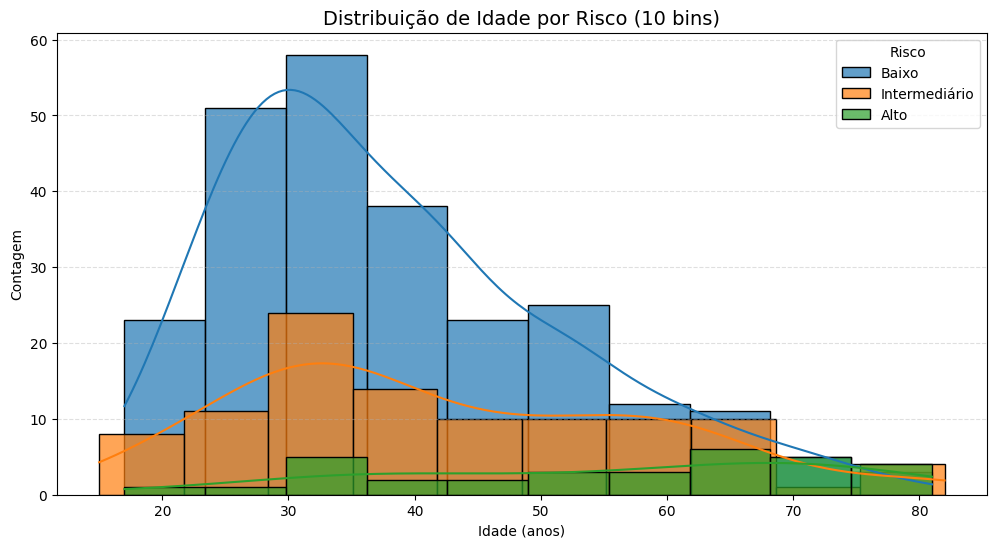

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações específicas para Idade
plt.figure(figsize=(12, 6))
n_bins = 10  # Número de bins para Idade

# Plotagem
for cls, label in zip([0, 1, 2], ['Baixo', 'Intermediário', 'Alto']):
    sns.histplot(
        data=df[df['Risco'] == cls],
        x='Idade',
        bins=n_bins,
        kde=True,
        alpha=0.7,
        label=label
    )

# Customização
plt.title('Distribuição de Idade por Risco (10 bins)', fontsize=14)
plt.xlabel('Idade (anos)')
plt.ylabel('Contagem')
plt.legend(title='Risco')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

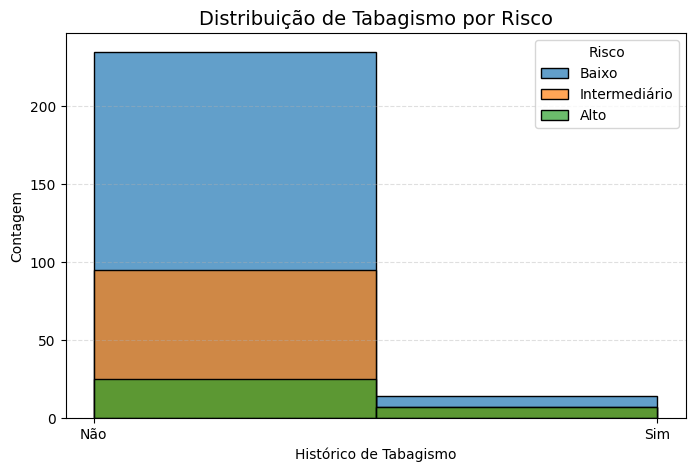

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações específicas para Tabagismo
plt.figure(figsize=(8, 5))
n_bins = 2  # Binário: Não (0) / Sim (1)

# Plotagem
for cls, label in zip([0, 1, 2], ['Baixo', 'Intermediário', 'Alto']):
    sns.histplot(
        data=df[df['Risco'] == cls],
        x='Histórico de Tabagismo',
        bins=n_bins,
        kde=False,
        alpha=0.7,
        label=label
    )

# Customização
plt.title('Distribuição de Tabagismo por Risco', fontsize=14)
plt.xlabel('Histórico de Tabagismo')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não', 'Sim'])  # Conversão de 0/1 para Não/Sim
plt.legend(title='Risco')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

##### Histogramas com Bins Estreitos (30 bins)

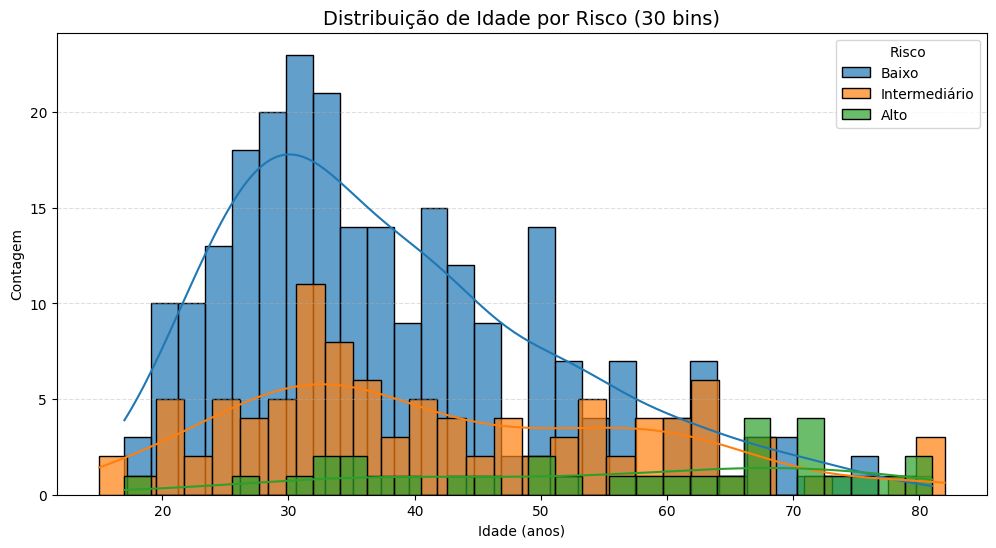

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações específicas para Idade
plt.figure(figsize=(12, 6))
n_bins = 30  # Número de bins para Idade

# Plotagem
for cls, label in zip([0, 1, 2], ['Baixo', 'Intermediário', 'Alto']):
    sns.histplot(
        data=df[df['Risco'] == cls],
        x='Idade',
        bins=n_bins,
        kde=True,
        alpha=0.7,
        label=label
    )

# Customização
plt.title('Distribuição de Idade por Risco (30 bins)', fontsize=14)
plt.xlabel('Idade (anos)')
plt.ylabel('Contagem')
plt.legend(title='Risco')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

## Atividade B - Simulação de Dados e Aproximação por Distribuição


##### Objetivo: Gerar dados artificiais, plotar histogramas, ajustar uma distribuição e calcular probabilidades (versão padronizada e não padronizada).

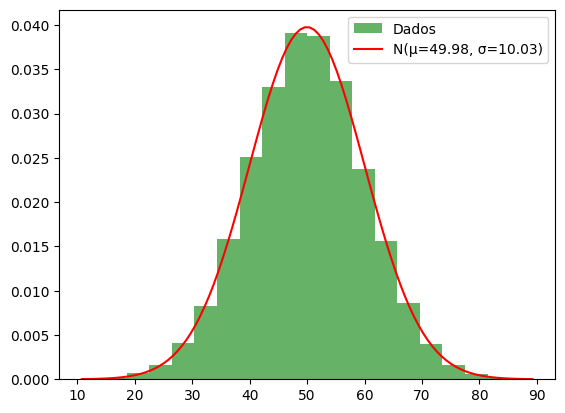

Probabilidade não padronizada: 68.13
Probabilidade padronizada (Z-score): 68.13


## Atividade C - Distribuição Binomial

In [131]:
df["Risco"].unique()

array([0, 1, 2], dtype=int64)

#### Dados de Risco

In [132]:
df['Risco'].value_counts()

Risco
0    249
1    102
2     32
Name: count, dtype: int64

In [133]:
df['Risco']

0      0
1      0
2      0
3      0
4      0
      ..
378    2
379    2
380    2
381    2
382    2
Name: Risco, Length: 383, dtype: int64

In [134]:
len(df['Risco']==2)

383

#### Visualizar para entender: a distribuição das possibilidades de riscos 

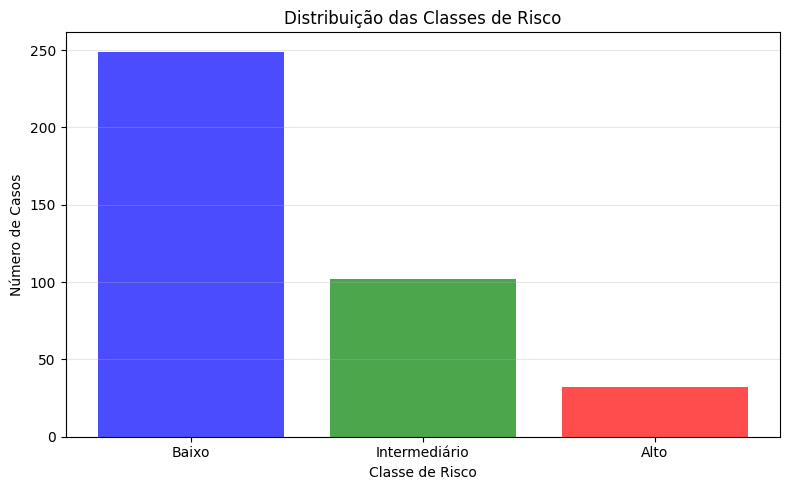

In [114]:
# Contando os casos por classe de risco
contagens = df['Risco'].value_counts()

# Definindo os rótulos e cores
labels = ['Baixo', 'Intermediário', 'Alto']
colors = ['blue', 'green', 'red']

# Plotando
plt.figure(figsize=(8, 5))
plt.bar(labels, contagens, color=colors, alpha=0.7)

plt.xlabel('Classe de Risco')
plt.ylabel('Número de Casos')
plt.title('Distribuição das Classes de Risco')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### Distribuição Binomial

#### Distribuição Binomial do Alto Risco

##### Esta importante distribuição é aplicada em casos de experimentos repetidos, onde existem dois possíveis resultados: cara ou coroa, sucesso ou fracasso, item defeituoso ou item não defeituoso, e muitos outros possíveis pares. A probabilidade de cada resultado pode ser calculada utilizando a regra da multiplicação, talvez com o uso do diagrama de árvore, porém é muito mais simples e eficiente utilizar uma equação generalizada.

#### No caso da nossa base de dados sobre tireoide, podemos aplicar essa distribuição considerando duas classes de risco: "Baixo" e "Alto". Assim, tratamos cada instância como um experimento binário, onde o desfecho é classificado como um dos dois riscos possíveis, possibilitando a análise estatística com base na distribuição binomial.

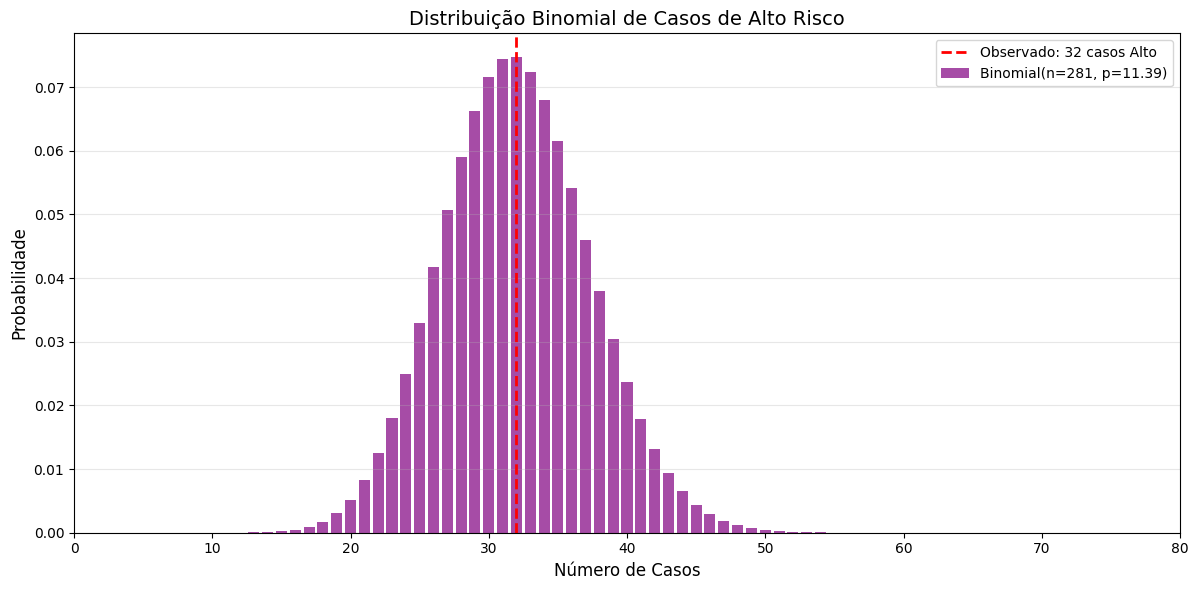

In [148]:
# Dados fornecidos diretamente
n_baixo = 249  # Número de casos Baixo (Risco = 0)
n_alto = 32    # Número de casos Alto (Risco = 2)

# Parâmetros da distribuição binomial
n_total = n_baixo + n_alto  # Total de casos = 249 + 32 = 281
p = n_alto / n_total        # Probabilidade de ser Alto = 32/281 

# x = Array com todos os possíveis números de sucessos (Alto Risco)
# Vai de 0 (nenhum caso Alto) até n_total (todos os casos Alto)
x = np.arange(0, n_total + 1)  # [0, 1, 2, ..., 281]

# Calcula a probabilidade para cada valor de x usando a distribuição binomial
# binom.pmf(x, n, p) = Probabilidade de obter exatamente x sucessos em n tentativas
probabilidades = binom.pmf(x, n_total, p)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(x, probabilidades, color='purple', alpha=0.7, label=f'Binomial(n={n_total}, p={(p*100):.2f})')

# Destacando o valor observado (32 casos Alto)
plt.axvline(x=n_alto, color='red', linestyle='--', linewidth=2, 
            label=f'Observado: {n_alto} casos Alto')

# Configurações do gráfico
plt.xlabel('Número de Casos', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.title('Distribuição Binomial de Casos de Alto Risco', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()



# Mostrar apenas um intervalo relevante no eixo x (evita cauda longa)
plt.xlim([0, 80])  # Ajuste conforme necessário
plt.show()

### Fórmula da Probabilidade Binomial

A probabilidade de obter exatamente `k` sucessos em `n` tentativas é dada por:

```math
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}
```

**Onde:**  
- `P(X = k)`: Probabilidade de exatamente `k` sucessos  
- `\binom{n}{k}`: Combinações de `n` elementos tomados `k` a `k` (n escolhe k)  
- `p`: Probabilidade de sucesso em uma tentativa  
- `1-p`: Probabilidade de falha  
- `n`: Número total de tentativas  
- `k`: Número de sucessos desejados  

**Exemplo com seus dados:**  
- `n = 281` (total de casos)  
- `p = 32/281 ≈ 0.1139` (prob. de alto risco)  
- Para `k = 26`:  
  ```math
  P(X=26) = \binom{281}{26} \cdot (0.1139)^{26} \cdot (0.8861)^{255} ≈ 0.053
  ```

#### Distribuição Binomial do Baixo Risco

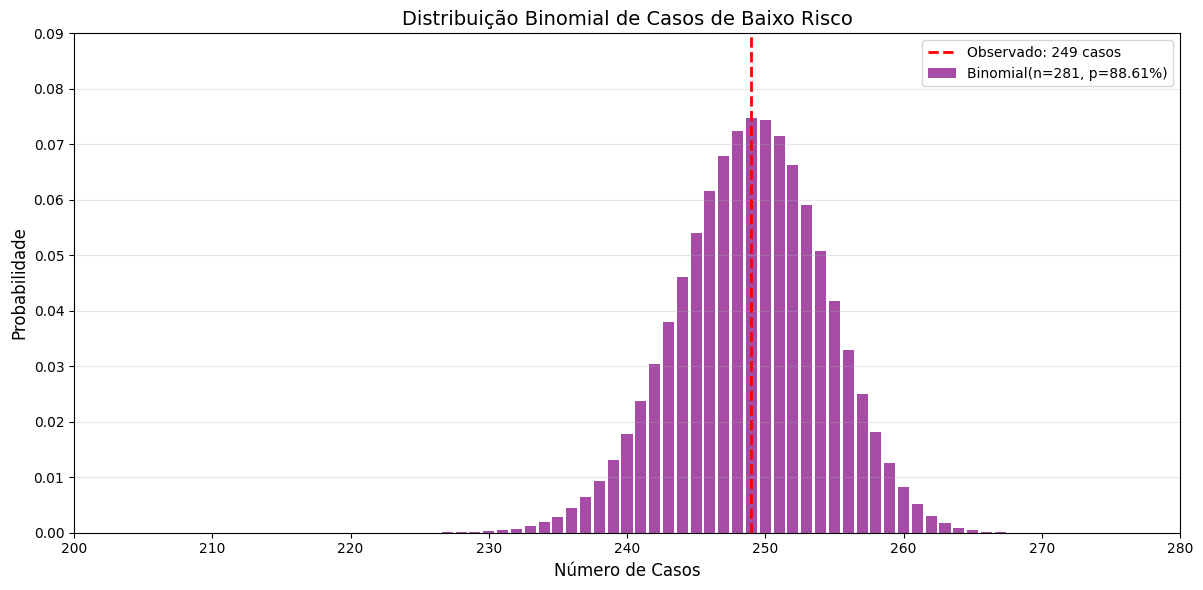

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n_baixo = 249
n_alto = 32
n_total = n_baixo + n_alto
p = n_baixo / n_total

x = np.arange(0, n_total + 1)
probabilidades = binom.pmf(x, n_total, p)

plt.figure(figsize=(12, 6))
plt.bar(x, probabilidades, color='purple', alpha=0.7, 
        label=f'Binomial(n={n_total}, p={(p*100):.2f}%)')

# Linha de observação
plt.axvline(x=n_baixo, color='red', linestyle='--', linewidth=2,
            label=f'Observado: {n_baixo} casos')

# Configuração dos eixos
plt.xlabel('Número de Casos', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.title(f'Distribuição Binomial de Casos de Baixo Risco', fontsize=14)

# Configuração do eixo Y mais sensata
plt.yticks(np.arange(0, 0.091, 0.01))  # De 0.00 a 0.09 em incrementos de 0.01
plt.ylim([0,.09])  # Ajuste para melhor visualização das barras

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.xlim([200, 280])
plt.show()

#### A altura da barra roxa no gráfico da distribuição binomial não está diretamente relacionada ao valor de p (probabilidade de sucesso), mas sim à probabilidade específica de obter exatamente k sucessos em n tentativas, calculada pela função de massa de probabilidade (PMF) da binomial.